In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
import os
import warnings
warnings.filterwarnings("ignore")

In [5]:
file_path = '/Users/imdaegyeong/Desktop/파이썬 연습장/xgboost/loans.csv'
df= pd.read_csv(file_path,index_col='client_id')

In [6]:
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
client_id,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


data type 
1. 수치형 
- 연속형(실수 float)
- 이산형(정수 int)
2. 범주형
- 순서형 (1,2,3,4...)
- 명목형 (성별,지역 등)

In [7]:
df.shape # (raw(sample),column(feature))

(443, 7)

In [8]:
df.info

<bound method DataFrame.info of           loan_type  loan_amount  repaid  loan_id  loan_start    loan_end  \
client_id                                                                   
46109          home        13672       0    10243  2002-04-16  2003-12-20   
46109        credit         9794       0    10984  2003-10-21  2005-07-17   
46109          home        12734       1    10990  2006-02-01  2007-07-05   
46109          cash        12518       1    10596  2010-12-08  2013-05-05   
46109        credit        14049       1    11415  2010-07-07  2012-05-21   
...             ...          ...     ...      ...         ...         ...   
26945         other        12963       0    10330  2001-11-26  2004-06-11   
26945        credit         1728       1    10248  2004-01-27  2005-06-21   
26945         other         9329       0    10154  2001-12-17  2004-07-22   
26945          home         4197       0    10333  2003-10-16  2005-07-10   
26945          home         3643       0    

In [9]:
df.dtypes

loan_type       object
loan_amount      int64
repaid           int64
loan_id          int64
loan_start      object
loan_end        object
rate           float64
dtype: object

In [10]:
df['repaid'] = df['repaid'].astype('category')
df['loan_id'] = df['loan_id'].astype('object')
df['loan_start'] = pd.to_datetime(df['loan_start'],format='%Y-%m-%d')
df['loan_end'] = pd.to_datetime(df['loan_end'],format='%Y-%m-%d')



In [11]:
df.dtypes

loan_type              object
loan_amount             int64
repaid               category
loan_id                object
loan_start     datetime64[ns]
loan_end       datetime64[ns]
rate                  float64
dtype: object

In [12]:
df.describe() #수치형 변수만 나타내줌

,loan_amount,loan_start,loan_end,rate
count,443.000000,443,443,443.000000
mean,7982.311512,2007-08-02 12:56:53.092550912,2009-08-23 11:35:37.246049536,3.217156
min,559.000000,2000-01-26 00:00:00,2001-08-02 00:00:00,0.010000
25%,4232.500000,2003-10-19 00:00:00,2005-09-12 12:00:00,1.220000
50%,8320.000000,2007-03-10 00:00:00,2009-03-19 00:00:00,2.780000
75%,11739.000000,2011-07-31 00:00:00,2013-09-11 12:00:00,4.750000
max,14971.000000,2014-11-11 00:00:00,2017-05-07 00:00:00,12.620000
std,4172.891992,NaN,NaN,2.397168


In [13]:
df.describe(exclude=[np.number]) # 수치형이 아닐때.

,loan_type,repaid,loan_id,loan_start,loan_end
count,443,443.0,443.0,443,443
unique,4,2.0,443.0,NaN,NaN
top,home,1.0,10243.0,NaN,NaN
freq,121,237.0,1.0,NaN,NaN
mean,NaN,NaN,NaN,2007-08-02 12:56:53.092550912,2009-08-23 11:35:37.246049536
min,NaN,NaN,NaN,2000-01-26 00:00:00,2001-08-02 00:00:00
25%,NaN,NaN,NaN,2003-10-19 00:00:00,2005-09-12 12:00:00
50%,NaN,NaN,NaN,2007-03-10 00:00:00,2009-03-19 00:00:00
75%,NaN,NaN,NaN,2011-07-31 00:00:00,2013-09-11 12:00:00
max,NaN,NaN,NaN,2014-11-11 00:00:00,2017-05-07 00:00:00


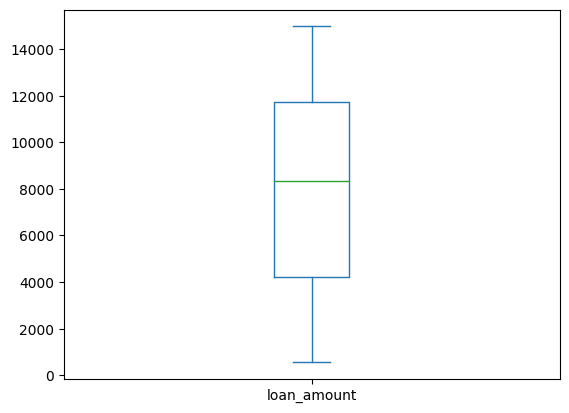

In [14]:
df['loan_amount'].plot(kind='box')             # 이상치(아웃라이어) 탐색에 가장 용이한 박스 플롯그리기.
plt.show()

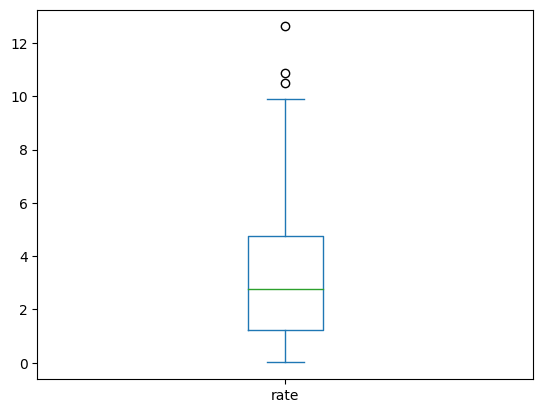

In [15]:
df['rate'].plot(kind='box')     # 이상치 3개 판정.
plt.show()

In [16]:
df['sqrt_rate'] = np.sqrt(df['rate']) # 제곱근 스케일링

In [17]:
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,sqrt_rate
client_id,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,1.466288
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,1.118034
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,0.824621
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,1.113553
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,1.769181


In [18]:
df['Log Rate'] = np.log(df['rate'])  #로그 스케일링

In [19]:
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,sqrt_rate,Log Rate
client_id,,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,1.466288,0.765468
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,1.118034,0.223144
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,0.824621,-0.385662
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,1.113553,0.215111
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,1.769181,1.141033


> 단위 통일
- 정규화(normalization) 
- 표준화(standardization) 

In [20]:
from sklearn.preprocessing import StandardScaler # 표준화

In [21]:
df_num = df[['loan_amount','rate']]
df_num.head()

,loan_amount,rate
client_id,,
46109,13672,2.15
46109,9794,1.25
46109,12734,0.68
46109,12518,1.24
46109,14049,3.13


In [22]:
SS = StandardScaler()  # 표준화

scaled_x = SS.fit_transform(df_num)
scaled_x

array([[ 1.36502962e+00, -4.45676908e-01],
       [ 4.34647423e-01, -8.21544457e-01],
       [ 1.13999132e+00, -1.05959390e+00],
       [ 1.08817014e+00, -8.25720763e-01],
       [ 1.45547678e+00, -3.63989115e-02],
       [-2.51263533e-01, -5.33379336e-01],
       [-4.33117505e-01,  2.61555546e+00],
       [ 1.12127812e+00,  3.85408004e-01],
       [ 7.38856969e-01,  9.45033020e-01],
       [-9.43412224e-01,  4.35523677e-01],
       [-1.52688038e+00,  1.36683993e+00],
       [ 1.01648330e-01, -1.13476741e+00],
       [ 2.57831622e-01, -9.84420394e-01],
       [-1.06960640e+00,  1.15384832e+00],
       [ 6.88715175e-01, -1.65864400e-01],
       [-1.54338725e-01, -8.04839232e-01],
       [ 9.52619355e-01,  3.45982920e-02],
       [ 5.00143642e-01, -4.05752176e-02],
       [ 9.66054477e-01, -1.01365454e+00],
       [-1.78094813e+00,  3.89584310e-01],
       [ 1.20620728e+00, -5.33379336e-01],
       [-9.91154890e-01, -1.00530192e+00],
       [ 1.04767198e-01, -9.96949312e-01],
       [ 9.

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
MS = MinMaxScaler()  # 정규화

MinMaxScaled = MS.fit_transform(df_num)
MinMaxScaled

array([[9.09866778e-01, 1.69706582e-01],
       [6.40785457e-01, 9.83346550e-02],
       [8.44782126e-01, 5.31324346e-02],
       [8.29794616e-01, 9.75416336e-02],
       [9.36025534e-01, 2.47422680e-01],
       [4.42409104e-01, 1.53053132e-01],
       [3.89814044e-01, 7.50991277e-01],
       [8.39369969e-01, 3.27517843e-01],
       [7.28767694e-01, 4.33782712e-01],
       [2.42228698e-01, 3.37034100e-01],
       [7.34804330e-02, 5.13877875e-01],
       [5.44476825e-01, 3.88580492e-02],
       [5.89647516e-01, 6.74068200e-02],
       [2.05731335e-01, 4.73433783e-01],
       [7.14265890e-01, 2.22839017e-01],
       [4.70441299e-01, 1.01506741e-01],
       [7.90591174e-01, 2.60904044e-01],
       [6.59728004e-01, 2.46629659e-01],
       [7.94476825e-01, 6.18556701e-02],
       [0.00000000e+00, 3.28310864e-01],
       [8.63932834e-01, 1.53053132e-01],
       [2.28420760e-01, 6.34417129e-02],
       [5.45378851e-01, 6.50277557e-02],
       [7.79905634e-01, 5.16256939e-01],
       [6.843602

In [27]:
df.dtypes

loan_type              object
loan_amount             int64
repaid               category
loan_id                object
loan_start     datetime64[ns]
loan_end       datetime64[ns]
rate                  float64
sqrt_rate             float64
Log Rate              float64
dtype: object

In [28]:
df.repaid.head()

client_id
46109    0
46109    0
46109    1
46109    1
46109    1
Name: repaid, dtype: category
Categories (2, int64): [0, 1]

In [29]:
dummy = pd.get_dummies(df['repaid'],drop_first=True)

In [30]:
dummy.head()

,1
client_id,
46109,False
46109,False
46109,True
46109,True
46109,True


In [31]:
dummy_2 = pd.get_dummies(df['loan_type'],drop_first=True)  # 0,1 을 True, false로 바꾸는 과정/ 

In [33]:
dummy_2 

,credit,home,other
client_id,,,
46109,False,True,False
46109,True,False,False
46109,False,True,False
46109,False,False,False
46109,True,False,False
...,...,...,...
26945,False,False,True
26945,True,False,False
26945,False,False,True


> 더미화 해주는것
1. 원핫인코딩
2. 라벨인코딩

In [34]:
# 원핫 인코딩 > 변수에 있는 카테고리를 자동으로 스케일링 해주는 기능 / 순서 상관 x
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# 순서가 상관있을때 사용하는것 : 라벨 인코더